In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb


In [22]:
df=pd.read_csv('AEP_hourly.csv')

In [23]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [24]:
df.set_index('Datetime',inplace=True)

In [26]:
df.index=pd.to_datetime(df.index)

<Axes: xlabel='Datetime'>

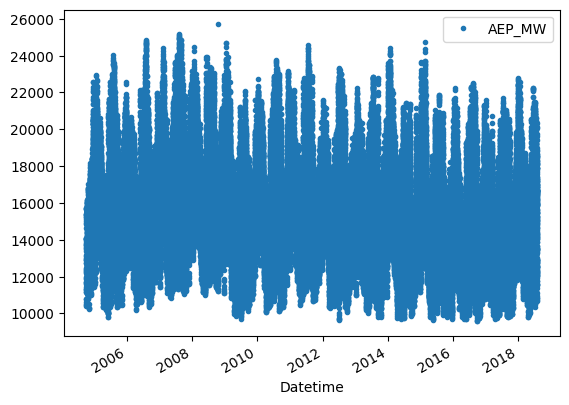

In [32]:
df.plot(style='.')

In [35]:
X=df[df.index<'01-01-2015']

In [36]:
y=df[df.index>'01-01-2015']

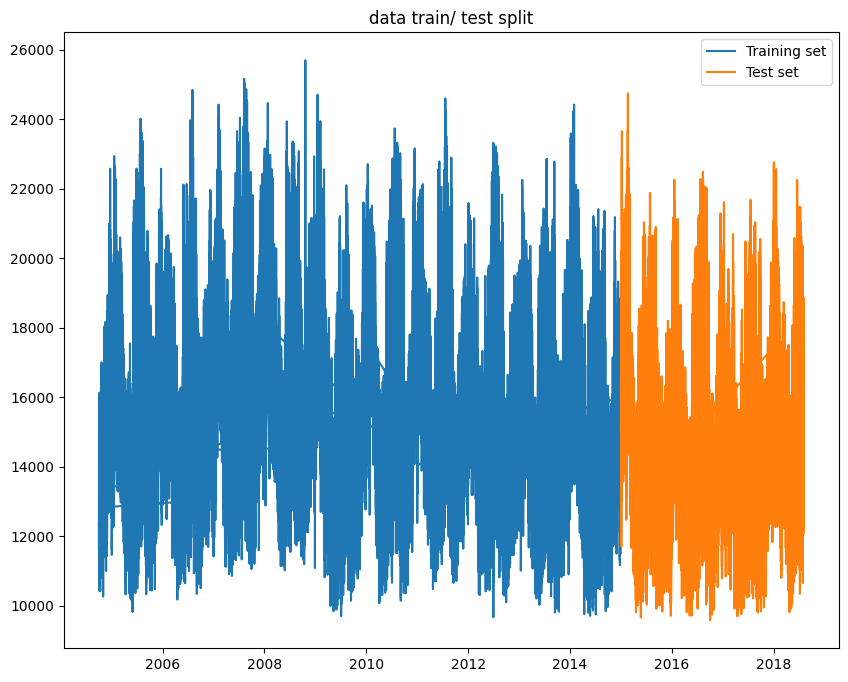

In [46]:
fig,ax=plt.subplots(figsize=(10,8))
plt.plot(X,label='Training set')
plt.plot(y,label='Test set')
plt.title('data train/ test split')
ax.legend(['Training set','Test set'])
plt.show()

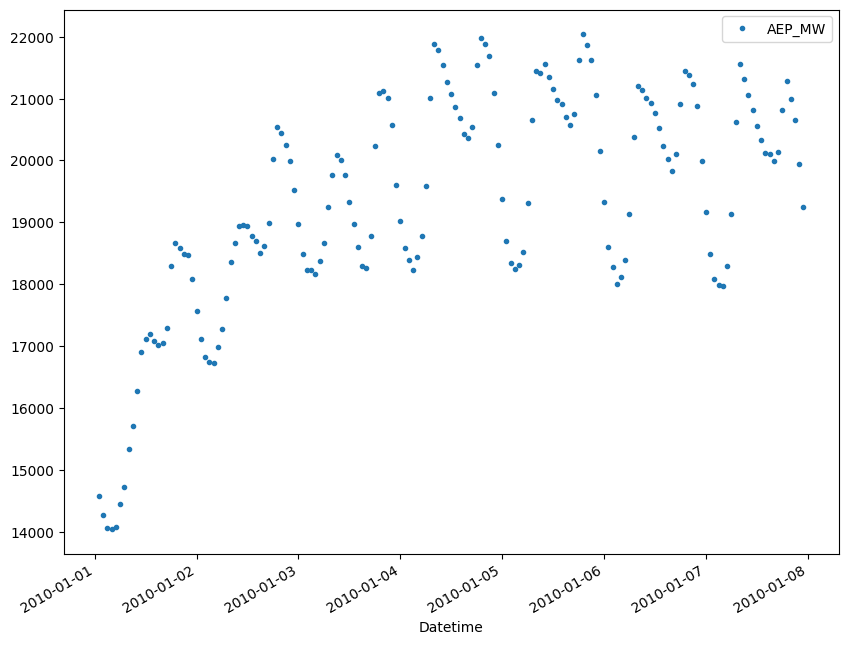

In [59]:
df.loc[(df.index >'01-01-2010') & (df.index <'01-08-2010')].plot(style='.',figsize=(10,8))
plt.show()

In [65]:
def newfeatures(df):
  df['hour']=df.index.hour
  df['dayofweek']=df.index.dayofweek
  df['month']=df.index.month
  df['year']=df.index.year
  df['dayofyear']=df.index.dayofyear
  df['quater']=df.index.quarter
  return df


In [66]:
df=newfeatures(df)

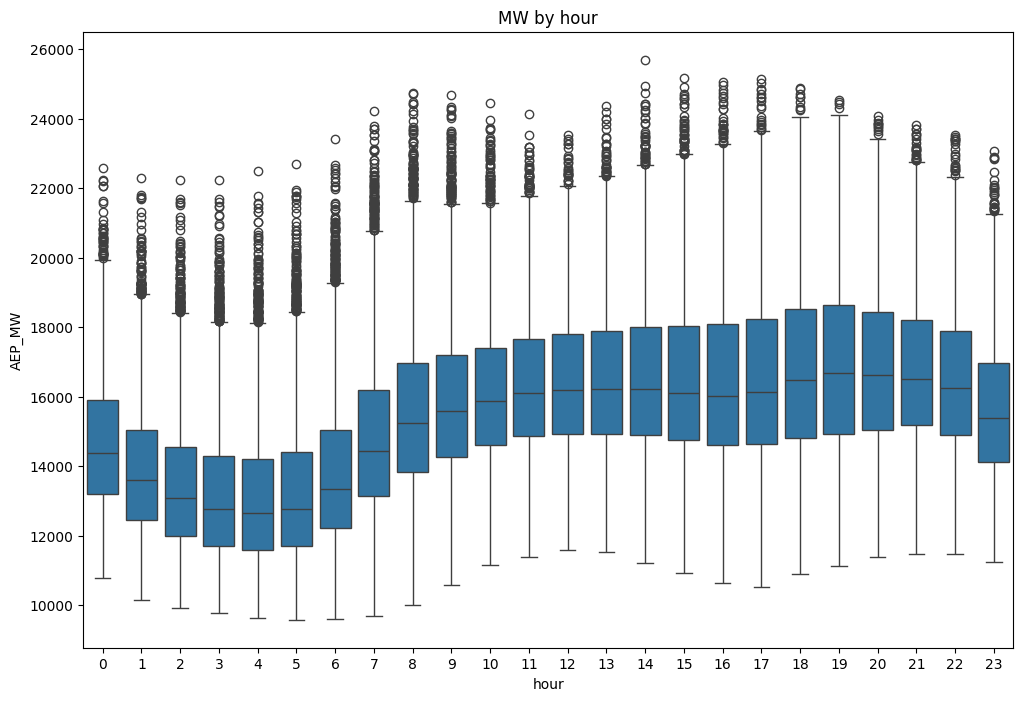

In [73]:
fig,ax=plt.subplots(figsize=(12,8))
sns.boxplot(x='hour',y='AEP_MW',data=df)
plt.title('MW by hour')
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error

In [80]:
train=newfeatures(X)

In [81]:
test=newfeatures(y)

<ipython-input-65-3908398386>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour']=df.index.hour
<ipython-input-65-3908398386>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek']=df.index.dayofweek
<ipython-input-65-3908398386>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [83]:
df.columns


Index(['AEP_MW', 'hour', 'dayofweek', 'month', 'year', 'dayofyear', 'quater'], dtype='object')

In [84]:
features=['hour', 'dayofweek', 'month', 'year', 'dayofyear', 'quater']
target=['AEP_MW']

In [85]:
x_train=train[features]
y_train=train[target]

In [89]:
reg=xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50,learning_rate=0.01)
reg.fit(x_train,y_train,eval_set=[(x_train,y_train)],verbose=100)

[0]	validation_0-rmse:2575.41300
[100]	validation_0-rmse:1703.54985
[200]	validation_0-rmse:1418.89371
[300]	validation_0-rmse:1305.23588
[400]	validation_0-rmse:1222.64880
[500]	validation_0-rmse:1169.67943
[600]	validation_0-rmse:1132.40057
[700]	validation_0-rmse:1103.46538
[800]	validation_0-rmse:1079.31343
[900]	validation_0-rmse:1055.41901
[999]	validation_0-rmse:1034.52599


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [90]:
reg.feature_importances_

array([0.40027365, 0.1697922 , 0.18737338, 0.07959997, 0.16296078,
       0.        ], dtype=float32)

In [91]:
fi=pd.DataFrame(data=reg.feature_importances_,index=features,columns=['importance'])

In [92]:
fi

,importance
hour,0.400274
dayofweek,0.169792
month,0.187373
year,0.079600
dayofyear,0.162961
quater,0.000000


<Axes: >

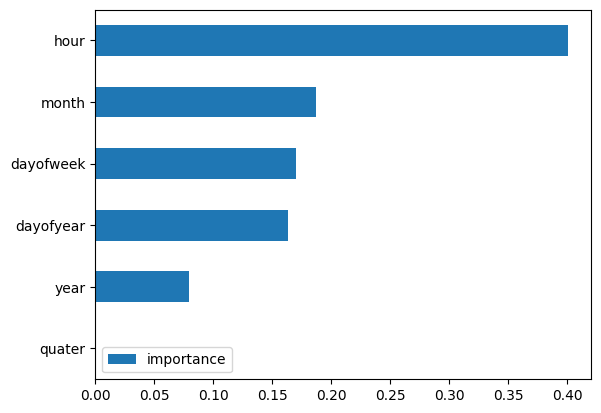

In [98]:
fi.sort_values('importance').plot(kind='barh')